Libraries

In [ ]:
# Importing Libraries suitable for Data manipulation & Mathematical operations:
import pandas as pd
import numpy as np

# Importing Libraries suitable for Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Kaggle for Credit
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Libraries for Preprocessing and Feature Handling
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Installing imblearn for importing SMOTE
!pip install imblearn

# Libraries for Data Splitting & Balancing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Libraries for Model Performance Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

#### Importing the Dataset

In [ ]:
# Set the path to the file you'd like to load
# Update file_path to the actual CSV file name within the dataset
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "mlg-ulb/creditcardfraud", file_path,)
print('\nData source import complete')

<ipython-input-2-b9f0a80dfe3d>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "mlg-ulb/creditcardfraud", file_path,)



Data source import complete


#### A . Data Exploration

In [ ]:
print(df.head().T)

                 0         1           2           3          4
Time      0.000000  0.000000    1.000000    1.000000   2.000000
V1       -1.359807  1.191857   -1.358354   -0.966272  -1.158233
V2       -0.072781  0.266151   -1.340163   -0.185226   0.877737
V3        2.536347  0.166480    1.773209    1.792993   1.548718
V4        1.378155  0.448154    0.379780   -0.863291   0.403034
V5       -0.338321  0.060018   -0.503198   -0.010309  -0.407193
V6        0.462388 -0.082361    1.800499    1.247203   0.095921
V7        0.239599 -0.078803    0.791461    0.237609   0.592941
V8        0.098698  0.085102    0.247676    0.377436  -0.270533
V9        0.363787 -0.255425   -1.514654   -1.387024   0.817739
V10       0.090794 -0.166974    0.207643   -0.054952   0.753074
V11      -0.551600  1.612727    0.624501   -0.226487  -0.822843
V12      -0.617801  1.065235    0.066084    0.178228   0.538196
V13      -0.991390  0.489095    0.717293    0.507757   1.345852
V14      -0.311169 -0.143772   -0.165946

Identification of Datatypes and Anomalies [Missing & Duplicate Values] in the Dataset:

In [ ]:
ds_mv = df.isnull().sum().sum()
ds_dt = df.dtypes
ds_dup = df.duplicated().sum()

In [ ]:
print("Missing Values Found:",ds_mv)
print("Duplicate Values Found:",ds_dup)

Missing Values Found: 0
Duplicate Values Found: 1081


**Imputation based on the outputs:**

**`Missing Values`** in our case are **`0`**, which means there are no missing values in the dataset.

**`Duplicate Values`** in our case are **`1081`**, which means there are 1081 duplicate values in the dataset. Therefore, imputation is needed for this dataset.

Imputation Method - **`Drop`**:

In [ ]:
initial_rows = df.shape[0]
df_dup_r = df.drop_duplicates(inplace=True)
rows_after_dropping_duplicates = df.shape[0]

print(f"Number of rows before dropping duplicates: {initial_rows}")
print(f"\nNumber of rows after dropping duplicates: {rows_after_dropping_duplicates}")
print(f"\nNumber of duplicate rows removed: {initial_rows - rows_after_dropping_duplicates}")

Number of rows before dropping duplicates: 284807

Number of rows after dropping duplicates: 283726

Number of duplicate rows removed: 1081


In [ ]:
print("Missing Values Found:",ds_mv)
print("Duplicate Values Found (After Imputation):",df_dup_r)

Missing Values Found: 0
Duplicate Values Found (After Imputation): None


In [ ]:
dfd = (pd.DataFrame({"Missing Values": ds_mv,"Duplicate Values": df_dup_r,"Data Types": ds_dt}))
print(dfd)

        Missing Values Duplicate Values Data Types
Time                 0             None    float64
V1                   0             None    float64
V2                   0             None    float64
V3                   0             None    float64
V4                   0             None    float64
V5                   0             None    float64
V6                   0             None    float64
V7                   0             None    float64
V8                   0             None    float64
V9                   0             None    float64
V10                  0             None    float64
V11                  0             None    float64
V12                  0             None    float64
V13                  0             None    float64
V14                  0             None    float64
V15                  0             None    float64
V16                  0             None    float64
V17                  0             None    float64
V18                  0         

Descriptive Statistics of the dataset (for numerical features):

In [ ]:
numcols_des = df.describe()[1:].T
display(numcols_des)

,mean,std,min,25%,50%,75%,max
Time,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


##### Initial Visualizations

Class Distribution (Non-Fraud vs. Fraud):

Class
0    283253
1       473
Name: count, dtype: int64


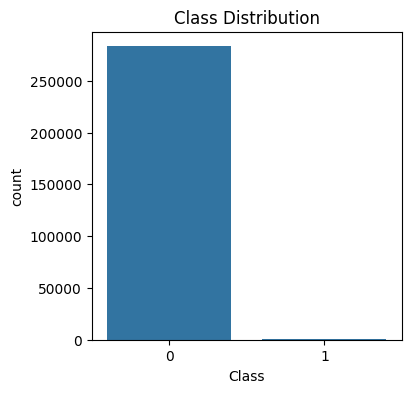

In [ ]:
# Creating countplot for Class Distribution:
clsdis = df['Class'].value_counts()
print(clsdis)

plt.figure(figsize=(4,4))
plt.title('Class Distribution')
sns.countplot(x=df['Class'])
plt.show()

###### Visualization of Histogram & Boxplot:

Histograms:

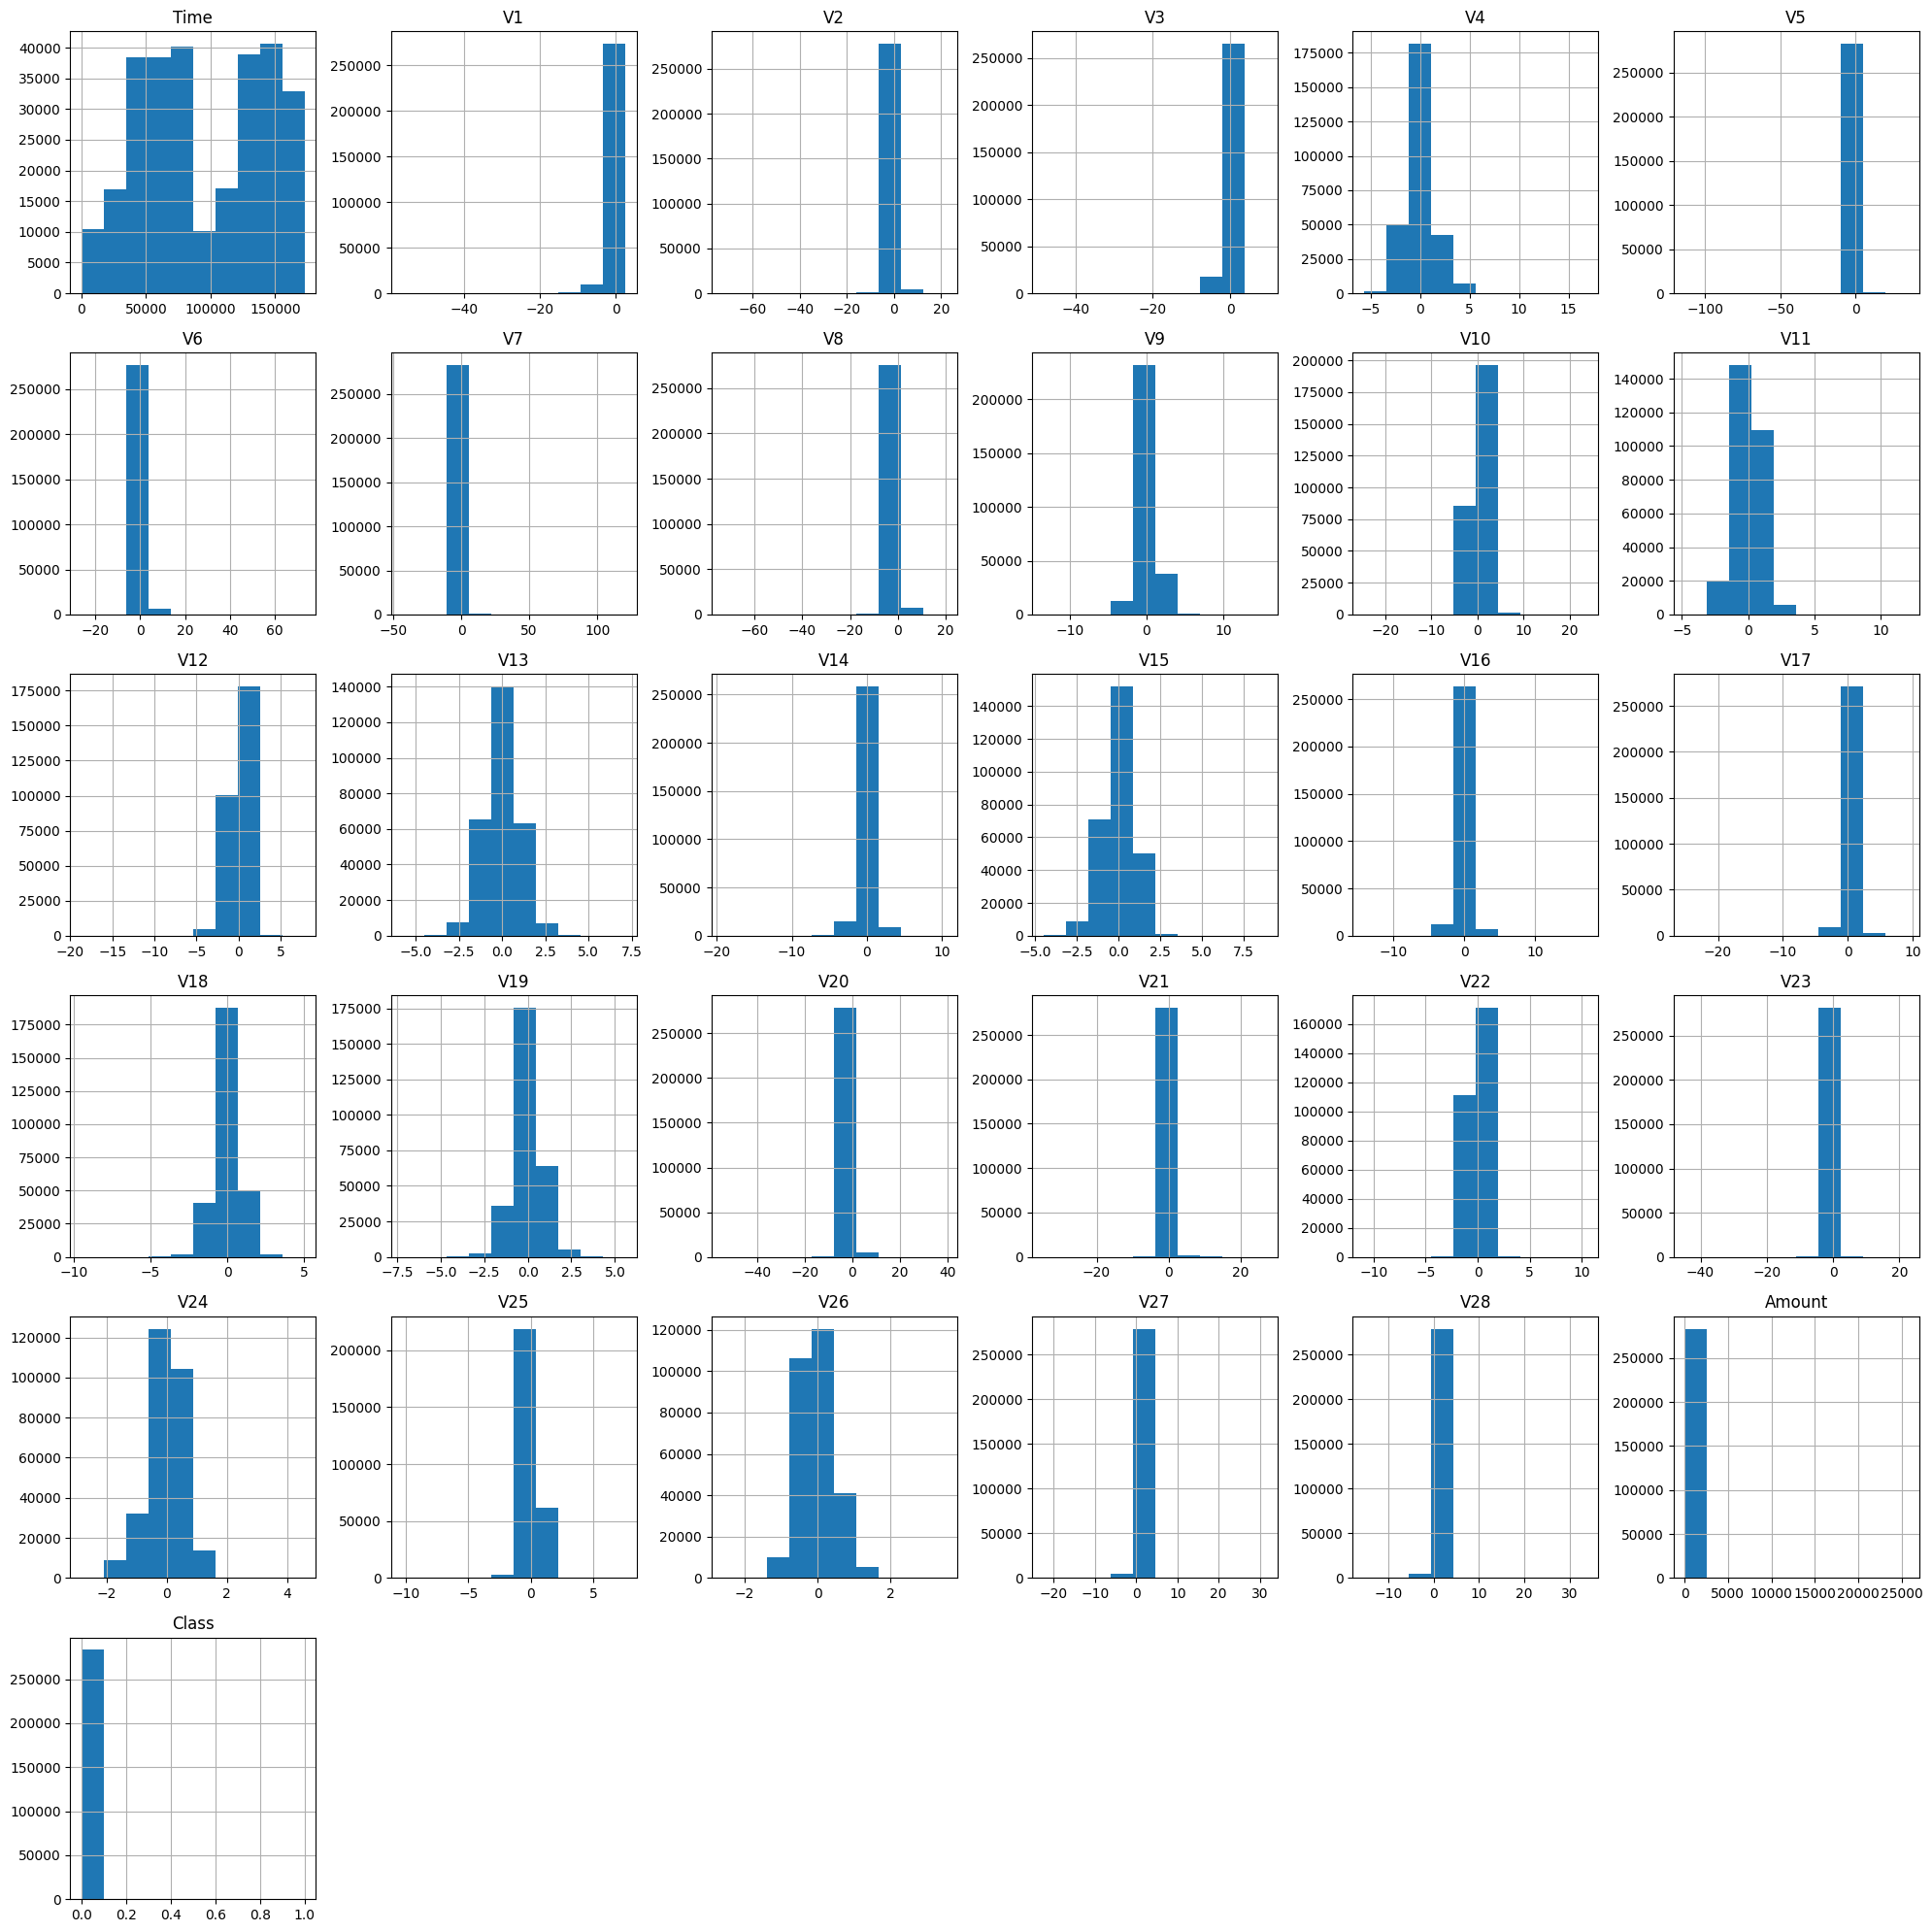

In [ ]:
# Creating histograms for each feature grouped by Class (NF = Not Fraud, F = Fraud)
df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

Boxplots:

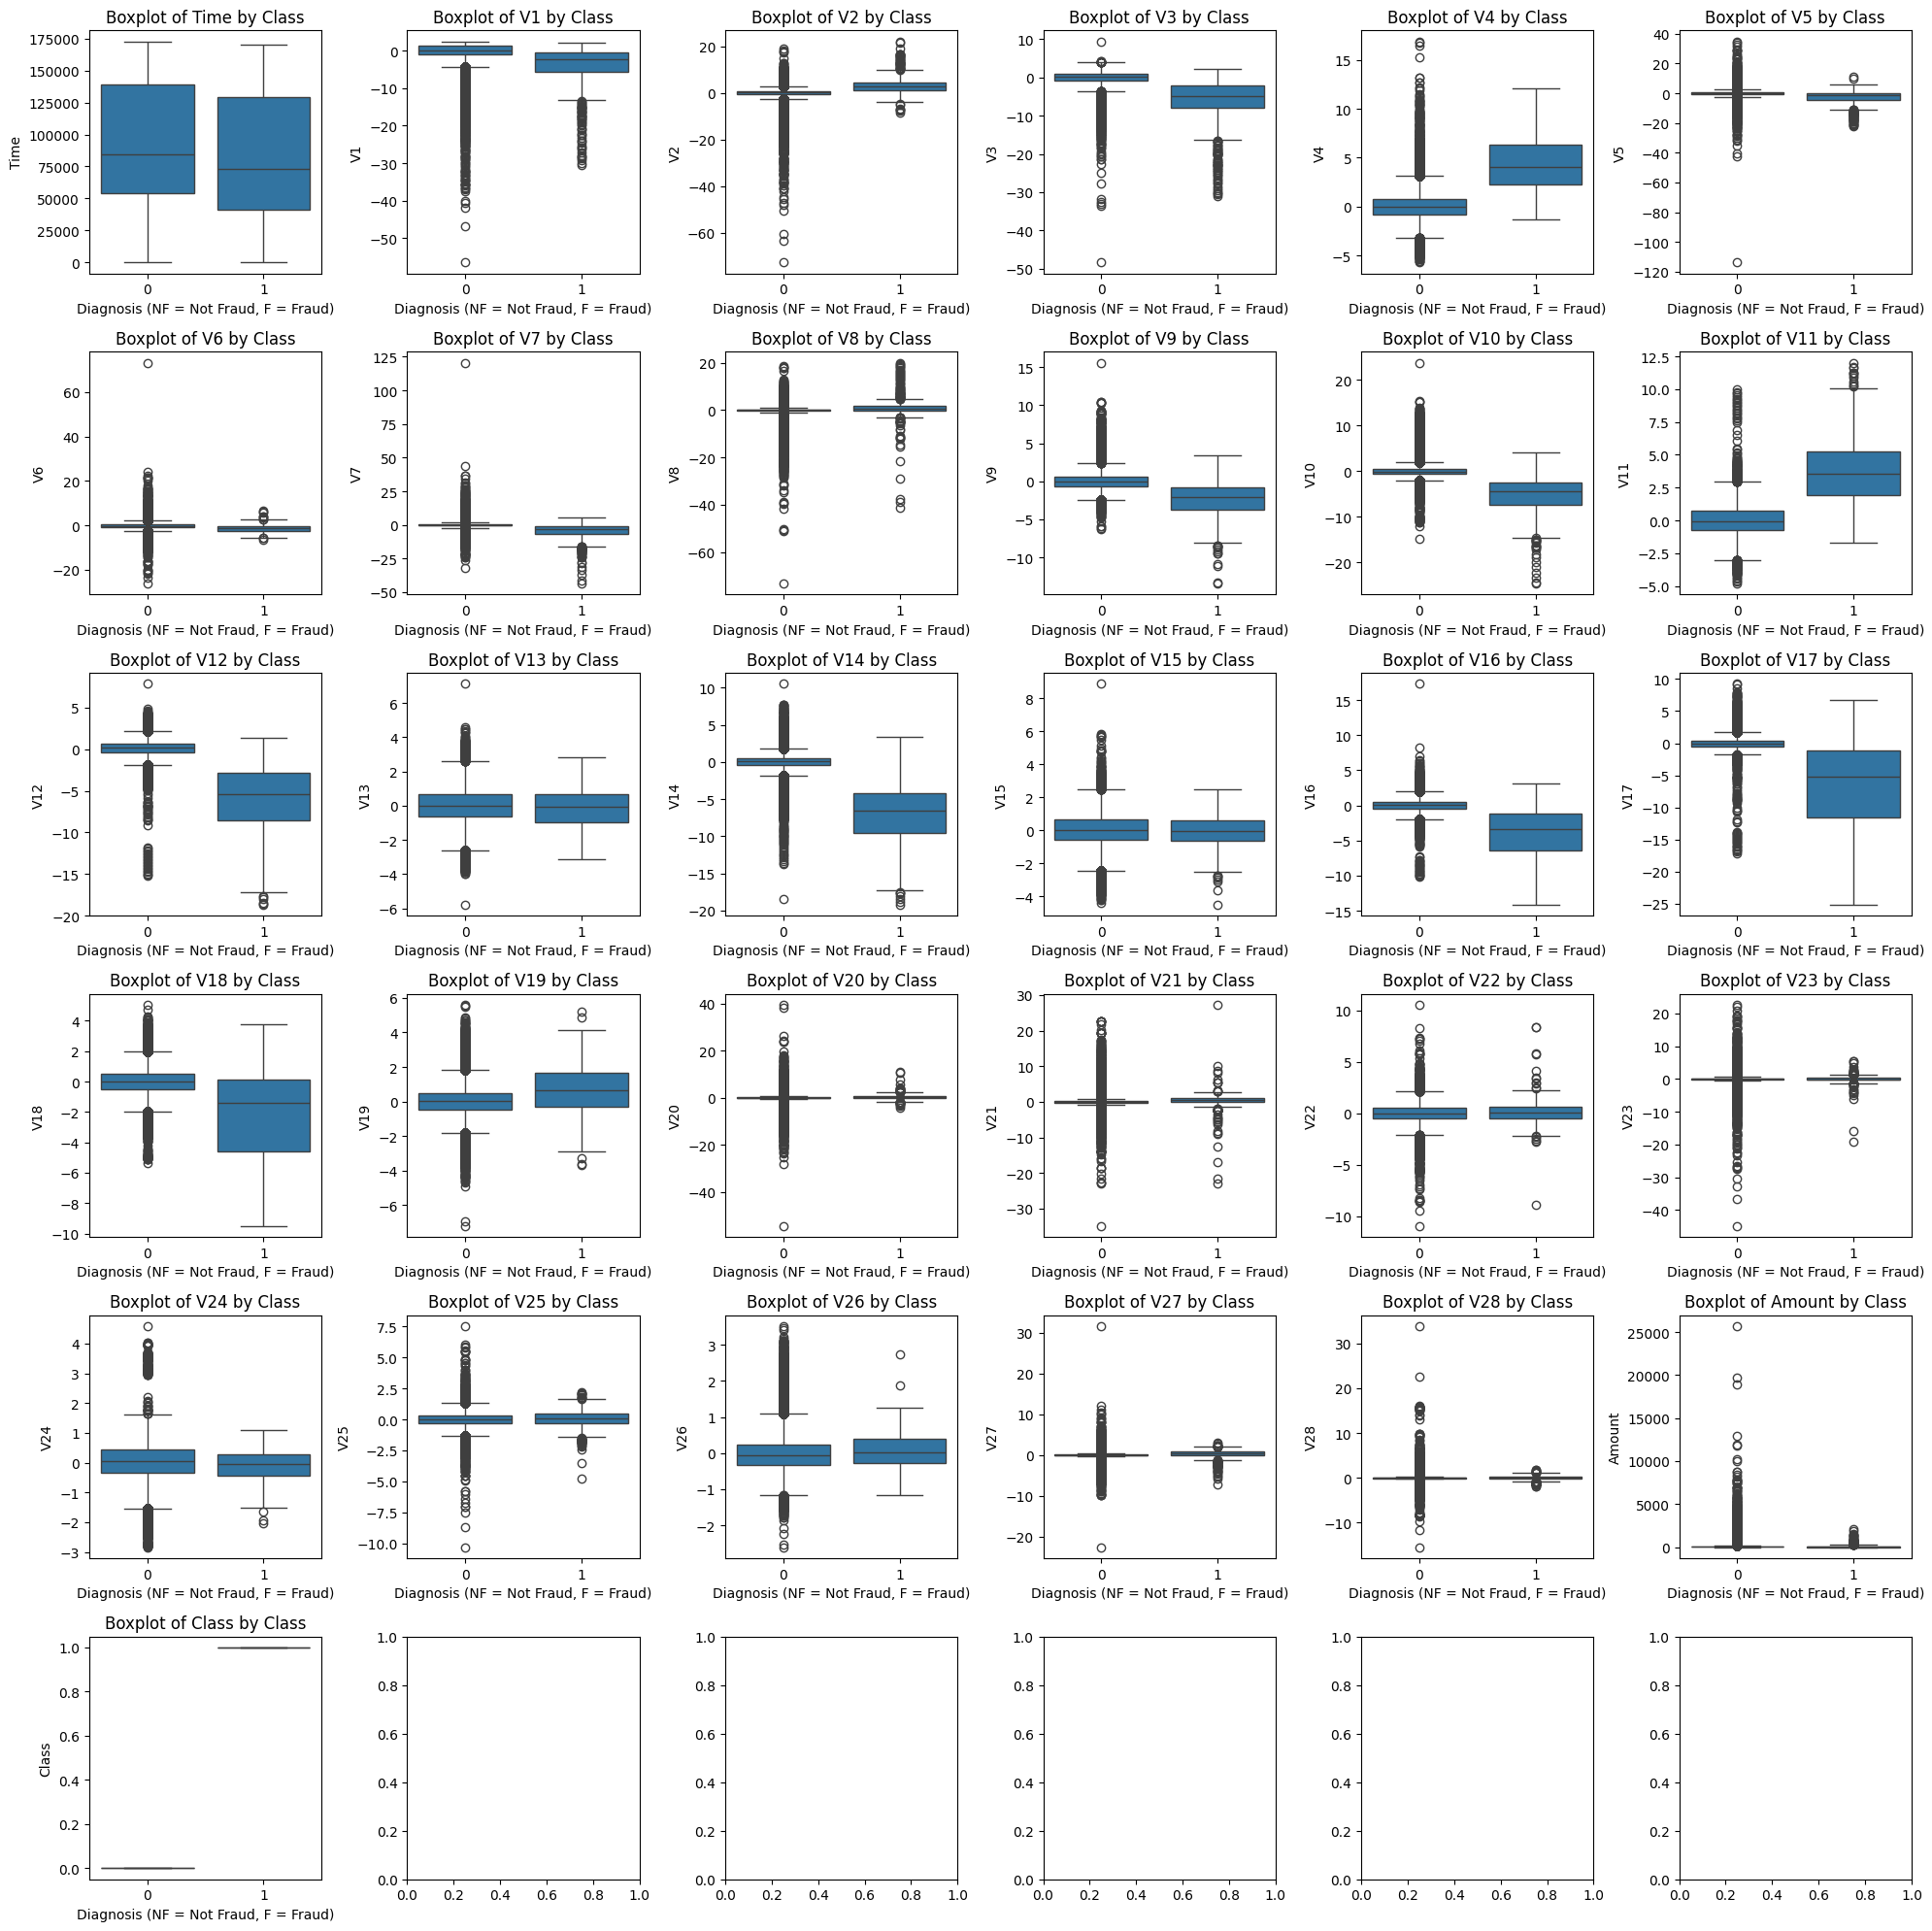

In [ ]:
# Creating boxplots for each feature grouped by Class (NF = Not Fraud, F = Fraud)
fig, ax = plt.subplots(6, 6, figsize=(20, 20))

for i, subplot in zip(df, ax.flatten()):
    sns.boxplot(x='Class', y=i, data=df, ax=subplot)
    subplot.set_title(f'Boxplot of {i} by Class')
    subplot.set_xlabel('Diagnosis (NF = Not Fraud, F = Fraud)')
    subplot.set_ylabel(i)

plt.tight_layout()
plt.show()

#### B. Data Preprocessing

##### Data Sampling

To address the class imbalance in the dataset. The undersampling technique is used to reduce/shrink the majority class of Non-Fraud transactions to balance the dataset.

To identify fraudulent and non-fraudulent transactions. The original Dataset is split into two DataFrames, **`fd`** (fraud) and **`nfd`** (non-fraud), based on the [`"Class"`] column. The undersampling **`nfd.sample()`** then randomly samples 20% of non-fraudulent transactions processed, combining this subset with all fraudulent data using **`pd.concat()`** results in a new DataFrame called **`shrinked_df`**. The new DataFrame is shuffled and resized to create a new balanced dataset. Finally, the code prints the new class distribution to confirm the effect of undersampling.

In [ ]:
# Split into fraud and non-fraud
fd = df[df['Class'] == 1]
nfd = df[df['Class'] == 0]

# Print class distribution
print("Before undersampling:")
print(clsdis)

# Randomly sample non-fraud cases (e.g., 10% of them)
nfd_sampled = nfd.sample(frac=0.2, random_state=42)

# Combine sampled non-fraud and all fraud
shrinked_df = pd.concat([fd, nfd_sampled], axis=0)

# Shuffle the resulting dataset
shrinked_df = shrinked_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("\nAfter undersampling:")
print(shrinked_df['Class'].value_counts())

Before undersampling:
Class
0    283253
1       473
Name: count, dtype: int64

After undersampling:
Class
0    56651
1      473
Name: count, dtype: int64


In [ ]:
df2 = shrinked_df

Normalization/Scaling:

In the Dataset, columns from `V1` to `V28` are already PCA-transformed since they have a mean and standard deviation of `~0` and `~1`. The columns `Amount` & `Time` are the only features that are not scaled and contain raw numerical values (in euros and seconds).

These numeric  values can bias the KNN algorithm, optimization of algorithms to converge slowly and distort distance and regularization-based models.

In [ ]:
# Assigning StandardScaler() as scaler:
scaler = StandardScaler()

# Normalizing/Scaling 'Amount' and 'Time' columns:
df_normalized = df2['normAmount'] = scaler.fit_transform(df2[['Amount']])
df_normalized = df2['normTime'] = scaler.fit_transform(df2[['Time']])

# Drop original columns:
dataset_dropped_result = df2.drop(['Amount', 'Time'], axis=1, inplace=True)
print(f"Result of inplace drop: {dataset_dropped_result}")

Result of inplace drop: None


In [ ]:
print(df2.head().T)

                   0         1         2         3         4
V1          1.275222 -0.416559  2.036992  0.951999 -0.295105
V2         -0.890689  0.466284  0.249977 -0.420878 -3.231249
V3          1.222468  0.466936 -2.404259  0.723724 -0.193462
V4         -0.609886 -1.341422  0.808501  1.326714 -0.786601
V5         -1.556688  2.108048  0.596284 -0.698391 -2.037128
V6          0.145304  3.574959 -0.999193  0.284780 -0.155836
V7         -1.405280 -0.177895  0.137203 -0.347857  0.196705
V8          0.337726  0.928795 -0.186738  0.194890 -0.024123
V9         -0.223027 -0.607344  0.836964  0.704253  1.811500
V10         0.666079 -0.458845 -1.044357 -0.094744 -1.323163
V11         1.372760 -0.042786 -0.557859  0.343302  0.784526
V12        -0.148876 -0.357546 -0.610830  0.855096  0.635075
V13        -0.890416  0.103160 -1.004782 -0.642698 -1.157312
V14        -0.282583  0.235429 -2.501734 -0.061109  0.388664
V15         0.001478  1.843897 -0.253857 -1.170215  0.900912
V16         1.072521  0.

Visualization of Histogram & Boxplot (After Data Sampling, Normalization & Scaling):

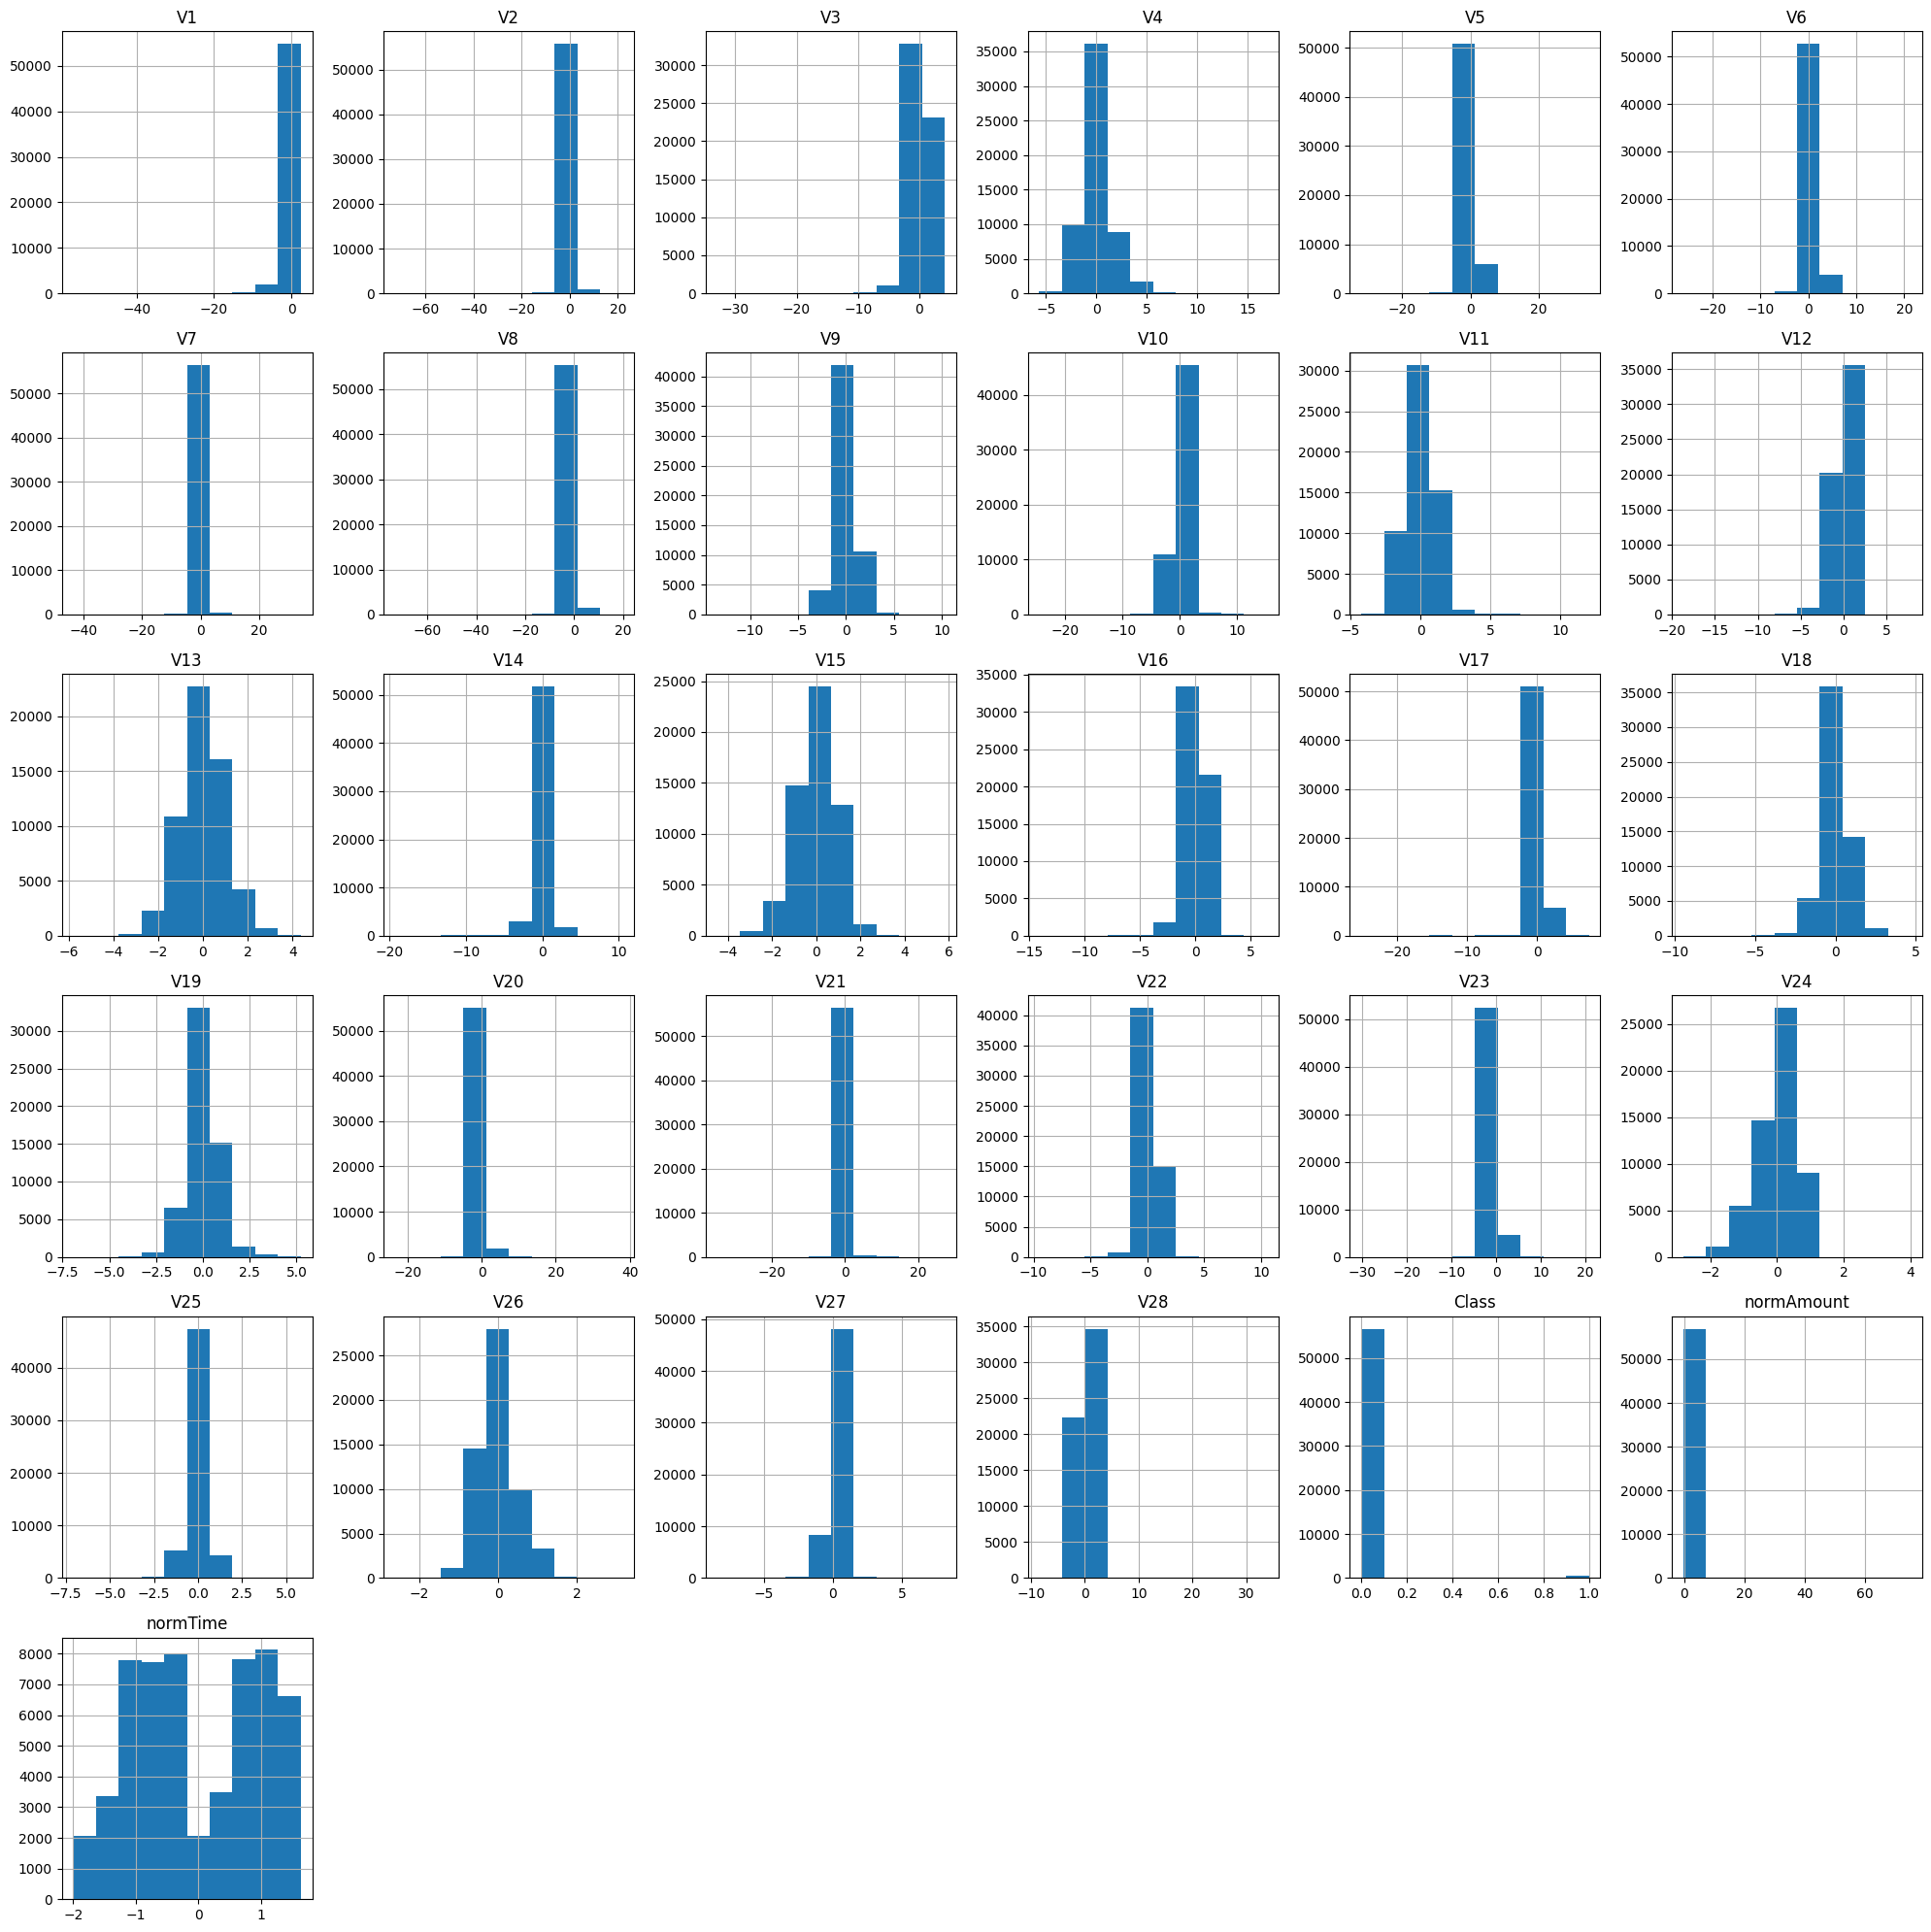

In [ ]:
# Creating histograms (After Data Sampling, Normalization & Scaling):
df2.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

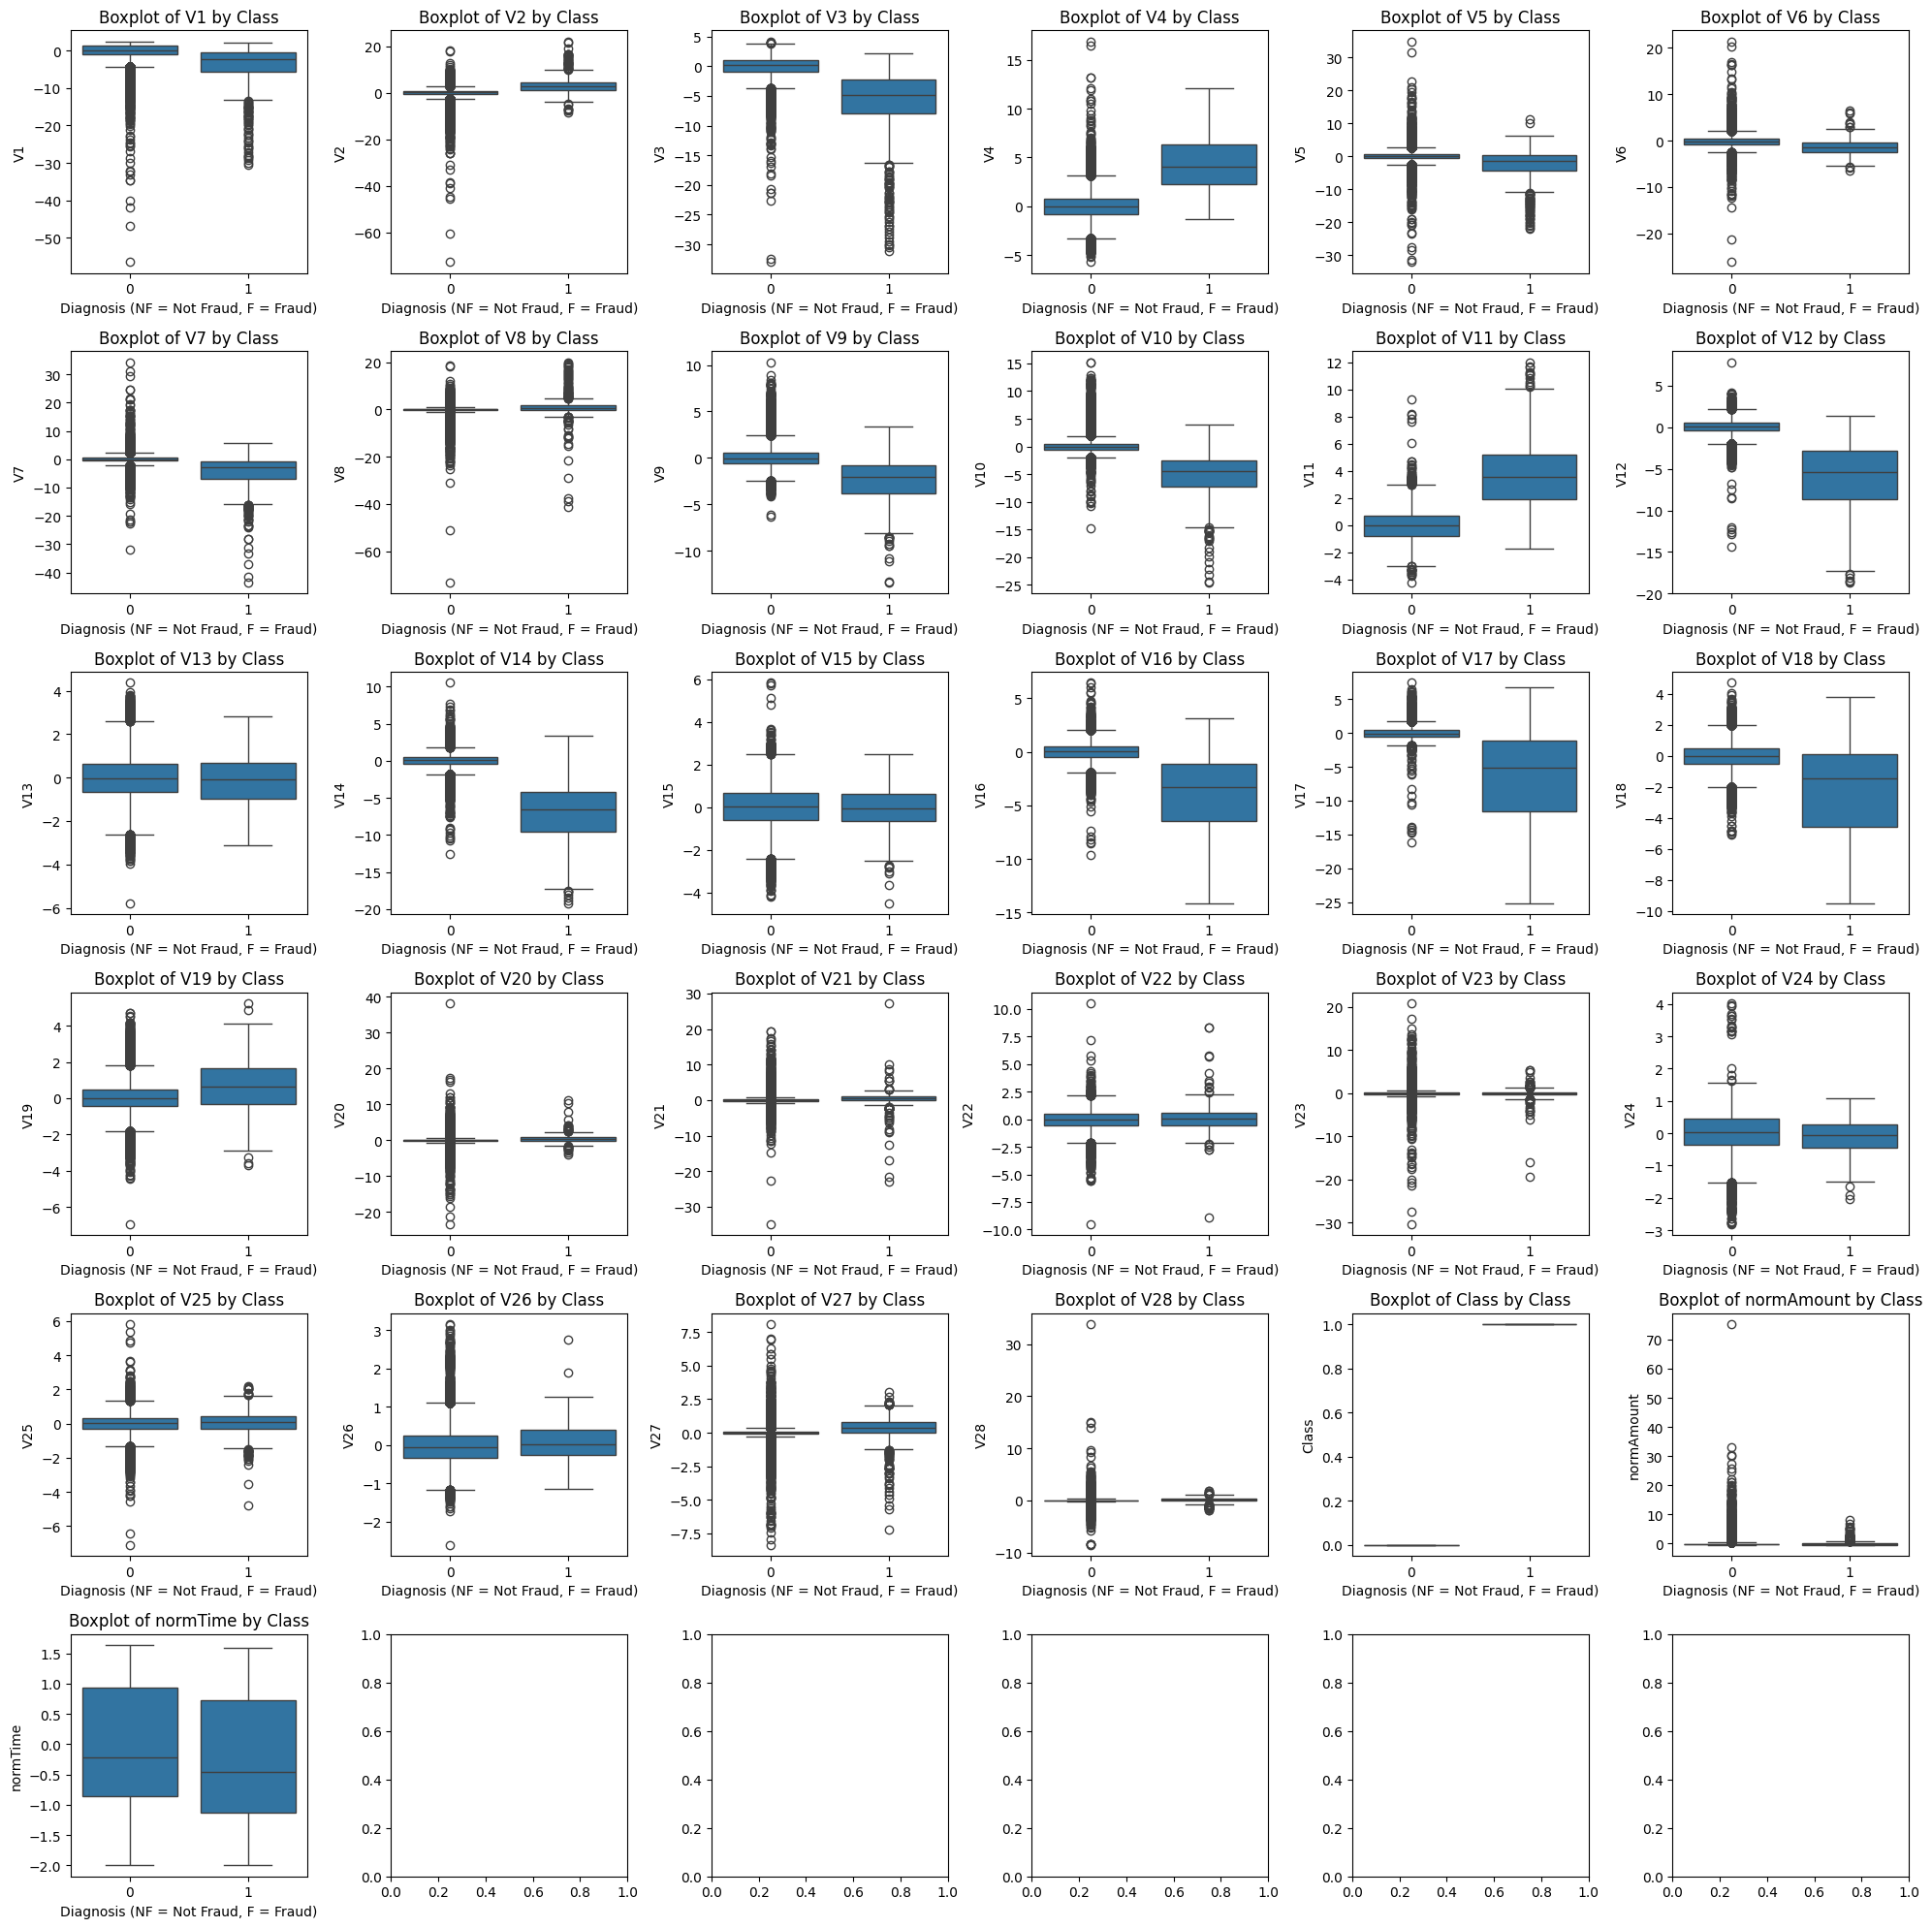

In [ ]:
# Creating boxplots (After Data Sampling, Normalization & Scaling):
fig, ax = plt.subplots(6,6, figsize=(20, 20))

for i, subplot in zip(df2, ax.flatten()):
    sns.boxplot(x='Class', y=i, data=df2, ax=subplot)
    subplot.set_title(f'Boxplot of {i} by Class')
    subplot.set_xlabel('Diagnosis (NF = Not Fraud, F = Fraud)')
    subplot.set_ylabel(i)

plt.tight_layout()
plt.show()

Correlation Matrix:

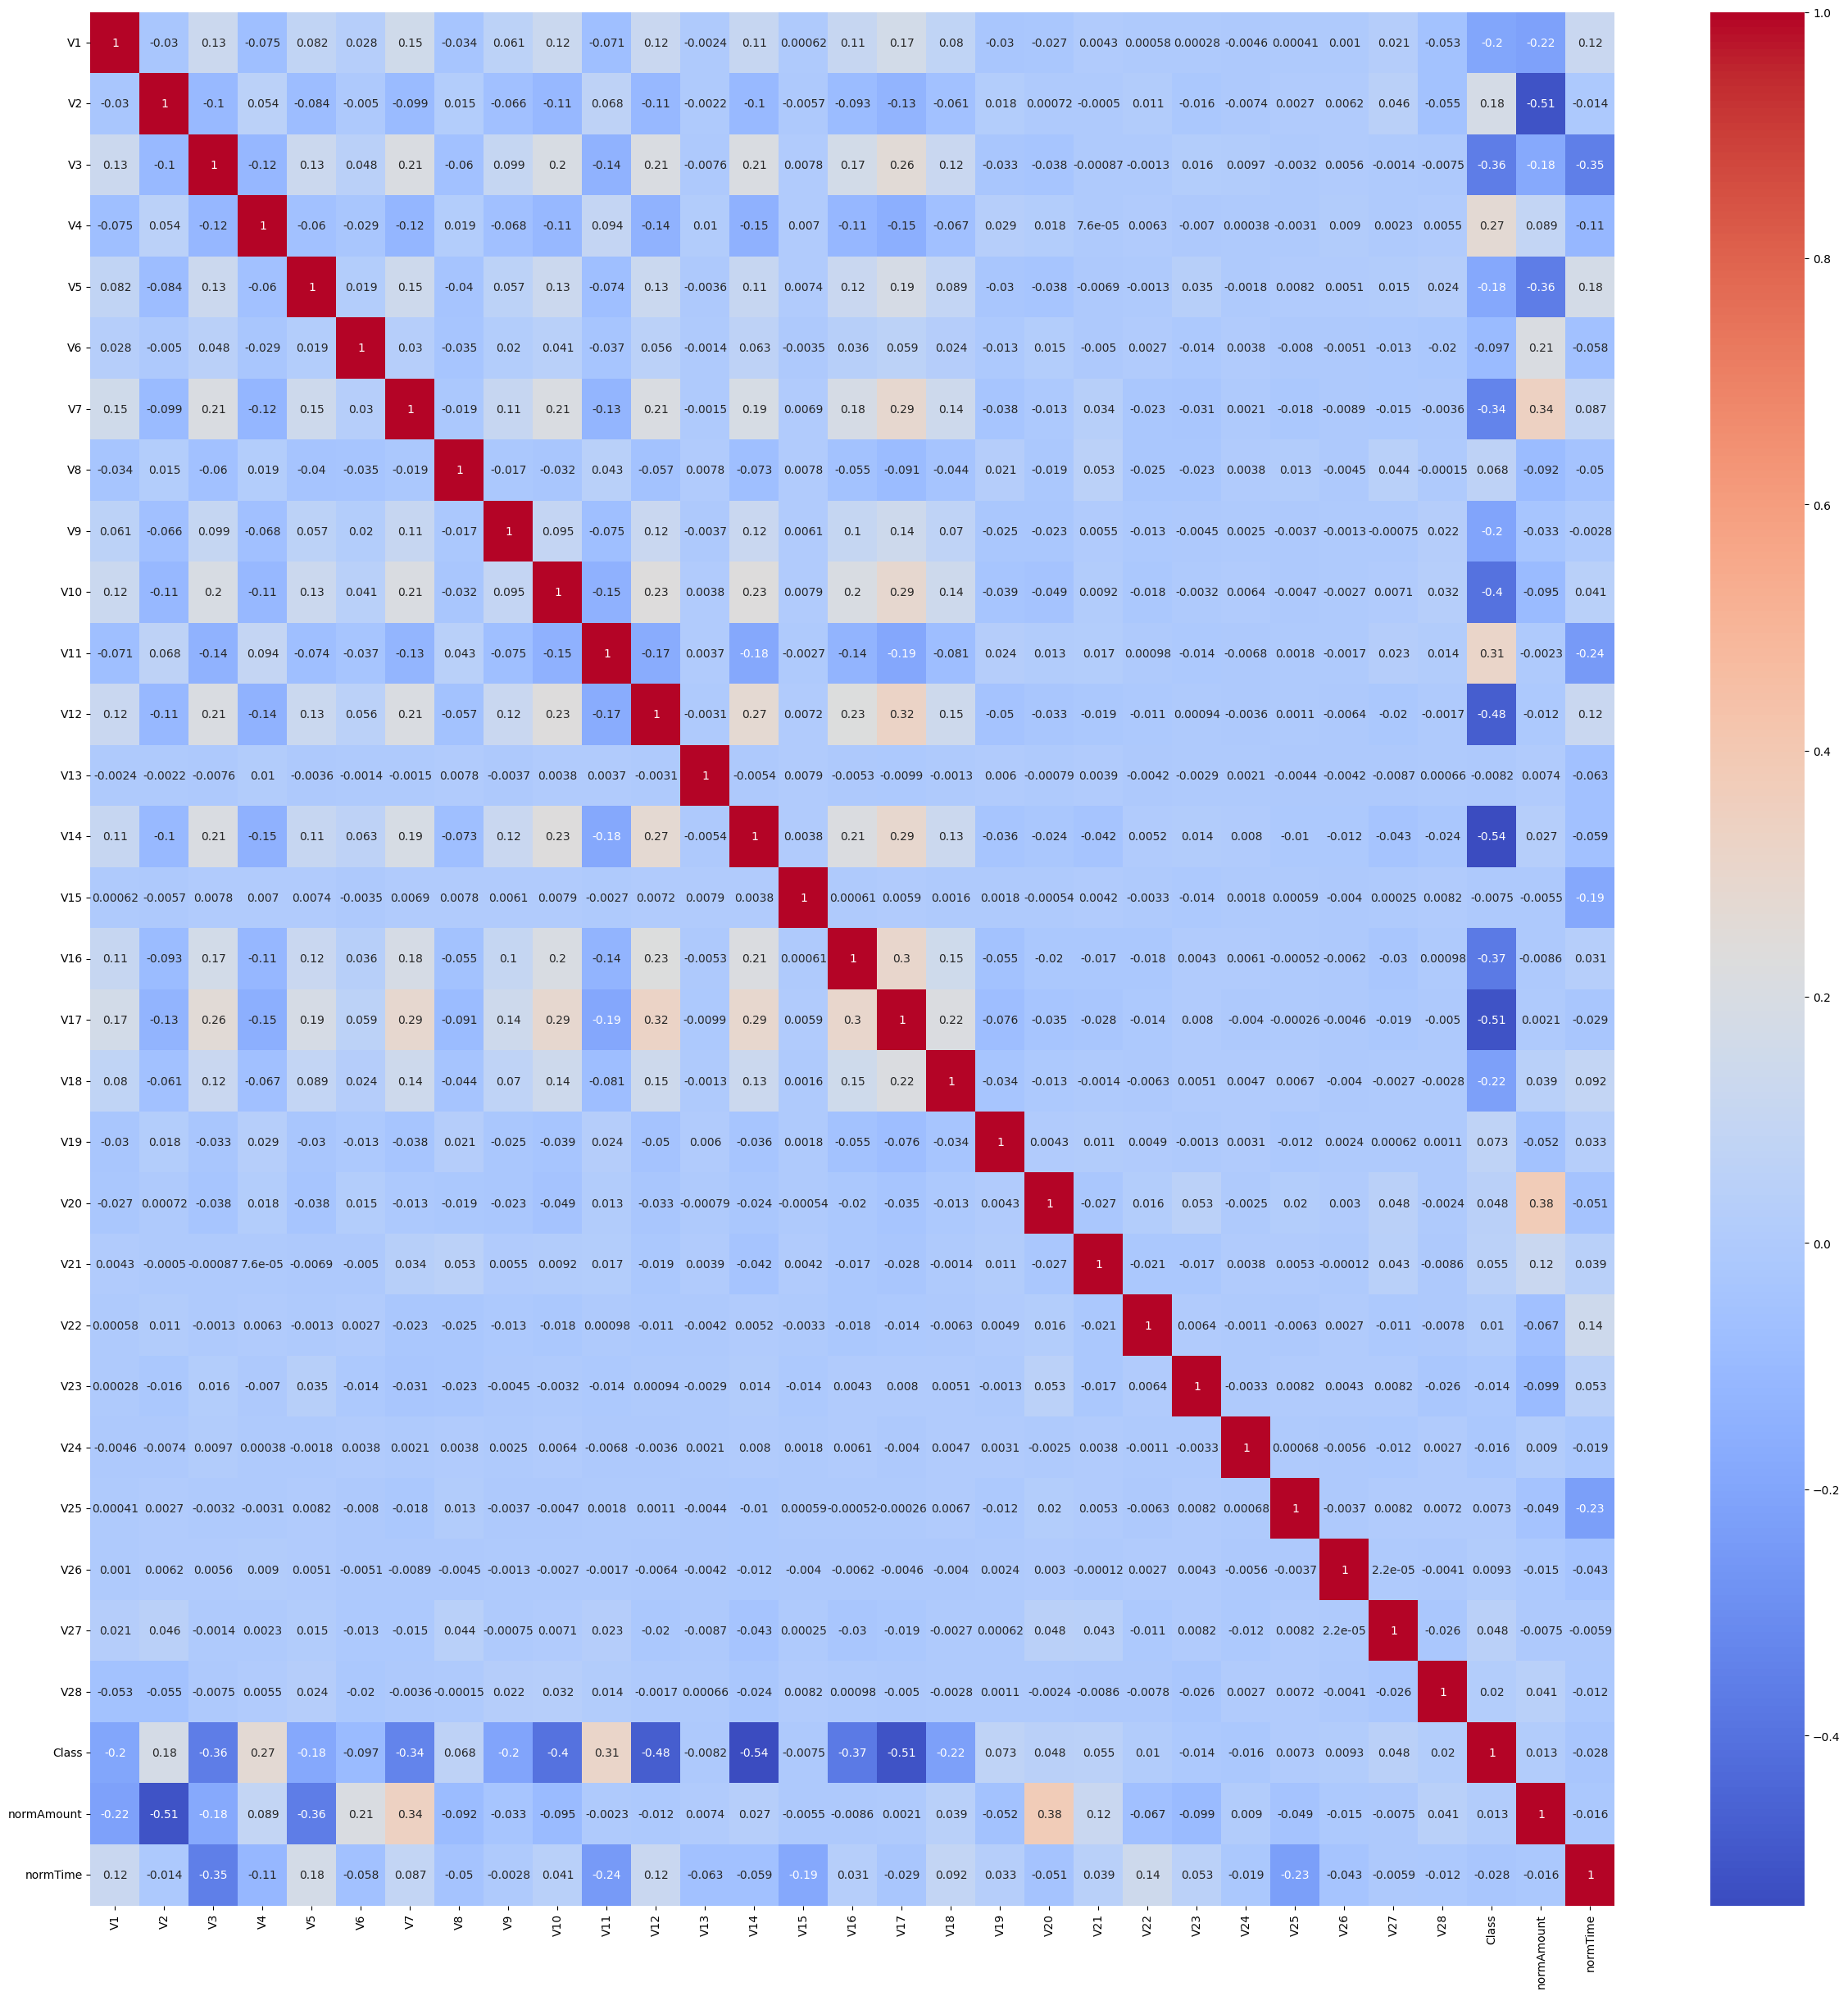

In [ ]:
# Creating a Pearson Correlation heatmap:
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True)
plt.show()

#### C . Model Training, Evaluation & Tuning

In [ ]:
# Assigning 'X' and 'Y'
X = df2.drop('Class', axis=1) #Dataset after dropping 'Class'
Y = df2['Class'] #Class column

In [ ]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (57124, 30)
Shape of Y: (57124,)


Balancing & Train-Test Split of Dataset:

**Chosen split ratio : `[80/20]`**

`80%` - Training set

`20%` - Testing set

An 80/20 split is a common and standard ratio for splitting data into train and test sets in supervised machine learning. I chose this split because it can provide
1. Balance between Learning and Evaluation.
2. Statistical Stability of Evaluation Metrics
3. Avoids Overfitting and Data Leakage

Due to the imbalance of target variable distribution. `SMOTE` is used to balance the target variable.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)

print("Shape of X_train", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train (45699, 30)
Shape of X_test: (11425, 30)
Shape of Y_train: (45699,)
Shape of Y_test: (11425,)


In [ ]:
# Display the class distribution in the training and testing sets
print("\nClass distribution in training set:")
print(Y_train.value_counts())
print("\nClass distribution in testing set:")
print(Y_test.value_counts())


Class distribution in training set:
Class
0    45321
1      378
Name: count, dtype: int64

Class distribution in testing set:
Class
0    11330
1       95
Name: count, dtype: int64


In [ ]:
sm = SMOTE(random_state=42)
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)

Class Distribution after SMOTE:
[45321 45321]


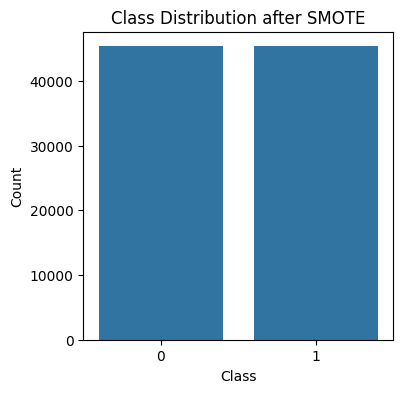

In [ ]:
# Visually viewing the Class Distribution after applying SMOTE
print("Class Distribution after SMOTE:")
print(np.bincount(Y_train_smote))

plt.figure(figsize=(4,4))
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
sns.countplot(x=Y_train_smote)
plt.show()

#### 1. Performance Metrics of `Logistic Regression` Classifier

Logistic Regression (Before Tuning):

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=5000,solver='liblinear')
log_reg.fit(X_train_smote, Y_train_smote)

LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

Performance Metrics of Logistic Regression (Before Tuning):

Logistic Regression Model (Accuracy) - 97.34%

Logistic Regression Model (Precision) - 22.57%

Logistic Regression Model (Recall) - 90.53%

Logistic Regression Model (F1 Score) - 36.13%

Logistic Regression Model (AUROC) - 93.96%

               precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     11330
       Fraud       0.23      0.91      0.36        95

    accuracy                           0.97     11425
   macro avg       0.61      0.94      0.67     11425
weighted avg       0.99      0.97      0.98     11425



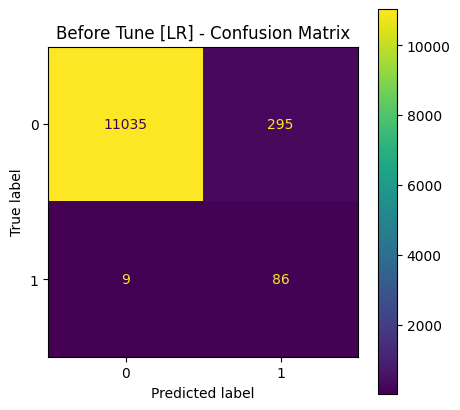

In [ ]:
y_pred = log_reg.predict(X_test)

l_r_accuracy = log_reg.score(X_test, Y_test)
l_r_precision = precision_score(Y_test, y_pred)
l_r_recall = recall_score(Y_test, y_pred)
l_r_f1 = f1_score(Y_test, y_pred)
l_r_roc_auc = roc_auc_score(Y_test, y_pred)

log_reg_accuracy = l_r_accuracy * 100
log_reg_precision = l_r_precision * 100
log_reg_recall = l_r_recall * 100
log_reg_f1 = l_r_f1 * 100
log_reg_roc_auc = l_r_roc_auc* 100

print('Performance Metrics of Logistic Regression (Before Tuning):')
print(f"\nLogistic Regression Model (Accuracy) - {log_reg_accuracy:.2f}%")
print(f"\nLogistic Regression Model (Precision) - {log_reg_precision:.2f}%")
print(f"\nLogistic Regression Model (Recall) - {log_reg_recall:.2f}%")
print(f"\nLogistic Regression Model (F1 Score) - {log_reg_f1:.2f}%")
print(f"\nLogistic Regression Model (AUROC) - {log_reg_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Not Fraud','Fraud']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, Y_test, ax=ax)
ax.set_title('Before Tune [LR] - Confusion Matrix')
plt.show()

Logistic Regression (After Tuning):

In [ ]:
sm_log_reg = LogisticRegression(random_state=42, max_iter=5000, solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [ ]:
grid = GridSearchCV(sm_log_reg, param_grid, cv=5)
grid.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

Performance Metrics of Logistic Regression (After Tuning):

Logistic Regression Model (Accuracy) - 97.33%

Logistic Regression Model (Precision) - 22.51%

Logistic Regression Model (Recall) - 90.53%

Logistic Regression Model (F1 Score) - 36.06%

Logistic Regression Model (AUROC) - 93.96%

               precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     11330
       Fraud       0.23      0.91      0.36        95

    accuracy                           0.97     11425
   macro avg       0.61      0.94      0.67     11425
weighted avg       0.99      0.97      0.98     11425



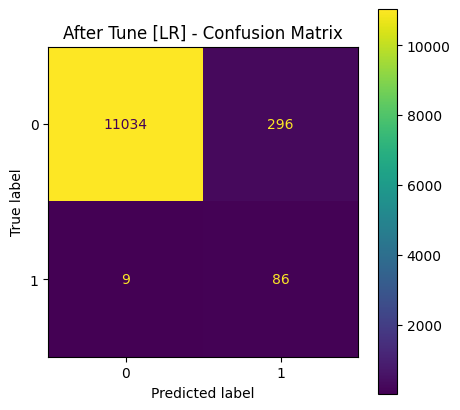

In [ ]:
best_log_reg = grid.best_estimator_
y_pred = best_log_reg.predict(X_test)

t_l_r_accuracy = best_log_reg.score(X_test, Y_test)
t_l_r_precision = precision_score(Y_test, y_pred)
t_l_r_recall = recall_score(Y_test, y_pred)
t_l_r_f1 = f1_score(Y_test, y_pred)
t_l_r_roc_auc = roc_auc_score(Y_test, y_pred)

tuned_log_reg_accuracy = t_l_r_accuracy * 100
tuned_log_reg_precision = t_l_r_precision * 100
tuned_log_reg_recall = t_l_r_recall * 100
tuned_log_reg_f1 = t_l_r_f1 * 100
tuned_log_reg_roc_auc = t_l_r_roc_auc* 100

print('Performance Metrics of Logistic Regression (After Tuning):')
print(f"\nLogistic Regression Model (Accuracy) - {tuned_log_reg_accuracy:.2f}%")
print(f"\nLogistic Regression Model (Precision) - {tuned_log_reg_precision:.2f}%")
print(f"\nLogistic Regression Model (Recall) - {tuned_log_reg_recall:.2f}%")
print(f"\nLogistic Regression Model (F1 Score) - {tuned_log_reg_f1:.2f}%")
print(f"\nLogistic Regression Model (AUROC) - {tuned_log_reg_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Not Fraud','Fraud']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(best_log_reg, X_test, Y_test, ax=ax)
ax.set_title('After Tune [LR] - Confusion Matrix')
plt.show()

#### 2. Performance Metrics of `Randon Forest` Classifier

Random Forest (Before Tuing):

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_clf.fit(X_train_smote, Y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

Performance Metrics of Random Forest (Before Tuning):

Random Forest Classifier Model (Accuracy) - 99.70%

Random Forest Classifier Model (Precision) - 79.61%

Random Forest Classifier Model (Recall) - 86.32%

Random Forest Classifier Model (F1 Score) - 82.83%

Random Forest Classifier Model (AUROC) - 93.07%

               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     11330
       Fraud       0.80      0.86      0.83        95

    accuracy                           1.00     11425
   macro avg       0.90      0.93      0.91     11425
weighted avg       1.00      1.00      1.00     11425



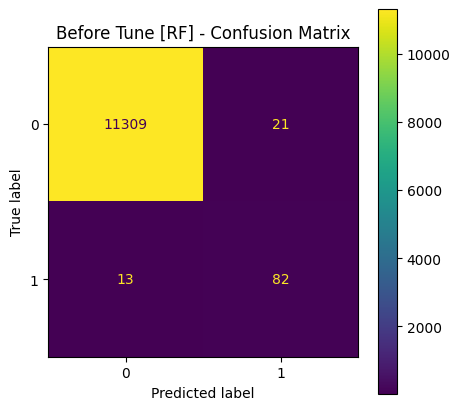

In [ ]:
y_pred = rf_clf.predict(X_test)

rc_accuracy = rf_clf.score(X_test, Y_test)
rc_precision = precision_score(Y_test, y_pred)
rc_recall = recall_score(Y_test, y_pred)
rc_f1 = f1_score(Y_test, y_pred)
rc_roc_auc = roc_auc_score(Y_test, y_pred)

rf_clf_accuracy = rc_accuracy * 100
rf_clf_precision = rc_precision * 100
rf_clf_recall = rc_recall * 100
rf_clf_f1 = rc_f1 * 100
rf_clf_roc_auc = rc_roc_auc* 100

print('Performance Metrics of Random Forest (Before Tuning):')
print(f"\nRandom Forest Classifier Model (Accuracy) - {rf_clf_accuracy:.2f}%")
print(f"\nRandom Forest Classifier Model (Precision) - {rf_clf_precision:.2f}%")
print(f"\nRandom Forest Classifier Model (Recall) - {rf_clf_recall:.2f}%")
print(f"\nRandom Forest Classifier Model (F1 Score) - {rf_clf_f1:.2f}%")
print(f"\nRandom Forest Classifier Model (AUROC) - {rf_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Not Fraud','Fraud']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, Y_test, ax=ax)
ax.set_title('Before Tune [RF] - Confusion Matrix')
plt.show()

Random Forest (After Tuning):

In [ ]:
sm_rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'bootstrap': [True]
}

In [ ]:
grid_rf = GridSearchCV(sm_rf_clf, param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_split=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

Performance Metrics of Random Forest (After SMOTE):

Random Forest Classifier Model (Accuracy) - 99.79%

Random Forest Classifier Model (Precision) - 90.80%

Random Forest Classifier Model (Recall) - 83.16%

Random Forest Classifier Model (F1 Score) - 86.81%

Random Forest Classifier Model (AUROC) - 91.54%

               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     11330
       Fraud       0.91      0.83      0.87        95

    accuracy                           1.00     11425
   macro avg       0.95      0.92      0.93     11425
weighted avg       1.00      1.00      1.00     11425



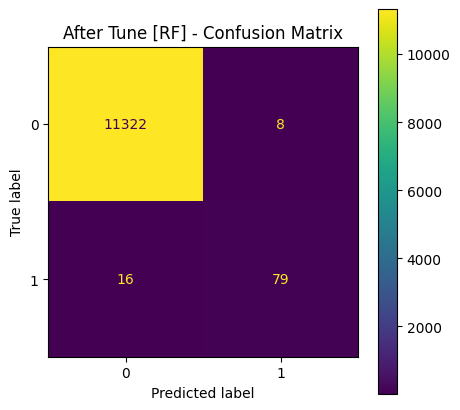

In [ ]:
best_rf_clf = grid_rf.best_estimator_
y_pred = best_rf_clf.predict(X_test)

t_rc_accuracy = best_rf_clf.score(X_test, Y_test)
t_rc_precision = precision_score(Y_test, y_pred)
t_rc_recall = recall_score(Y_test, y_pred)
t_rc_f1 = f1_score(Y_test, y_pred)
t_rc_roc_auc = roc_auc_score(Y_test, y_pred)

tuned_rf_clf_accuracy = t_rc_accuracy * 100
tuned_rf_clf_precision = t_rc_precision * 100
tuned_rf_clf_recall = t_rc_recall * 100
tuned_rf_clf_f1 = t_rc_f1 * 100
tuned_rf_clf_roc_auc = t_rc_roc_auc* 100

print('Performance Metrics of Random Forest (After SMOTE):')
print(f"\nRandom Forest Classifier Model (Accuracy) - {tuned_rf_clf_accuracy:.2f}%")
print(f"\nRandom Forest Classifier Model (Precision) - {tuned_rf_clf_precision:.2f}%")
print(f"\nRandom Forest Classifier Model (Recall) - {tuned_rf_clf_recall:.2f}%")
print(f"\nRandom Forest Classifier Model (F1 Score) - {tuned_rf_clf_f1:.2f}%")
print(f"\nRandom Forest Classifier Model (AUROC) - {tuned_rf_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Not Fraud','Fraud']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(best_rf_clf, X_test, Y_test, ax=ax)
ax.set_title('After Tune [RF] - Confusion Matrix')
plt.show()

#### 3. Performance Metrics of `K-Nearest Neighbors` Classifier

K-Nearest Neighbors (Before Tuning):

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_smote, Y_train_smote)

KNeighborsClassifier()

Performance Metrics of K-Nearest Neighbors (Before Tuning):

KNeighbors Classifier Model (Accuracy) - 99.18%

KNeighbors Classifier Model (Precision) - 50.29%

KNeighbors Classifier Model (Recall) - 90.53%

KNeighbors Classifier Model (F1 Score) - 64.66%

KNeighbors Classifier Model (AUROC) - 94.89%

               precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00     11330
       Fraud       0.50      0.91      0.65        95

    accuracy                           0.99     11425
   macro avg       0.75      0.95      0.82     11425
weighted avg       1.00      0.99      0.99     11425



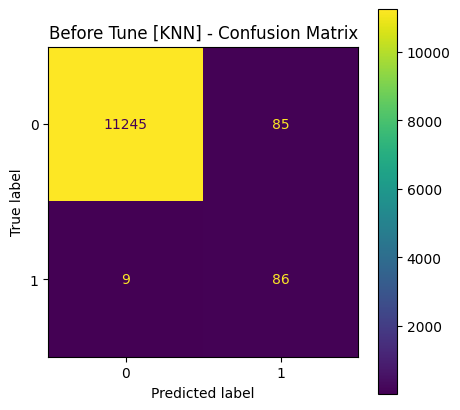

In [ ]:
y_pred = knn_clf.predict(X_test)

kc_accuracy = knn_clf.score(X_test, Y_test)
kc_precision = precision_score(Y_test, y_pred)
kc_recall = recall_score(Y_test, y_pred)
kc_f1 = f1_score(Y_test, y_pred)
kc_roc_auc = roc_auc_score(Y_test, y_pred)

knn_clf_accuracy = kc_accuracy * 100
knn_clf_precision = kc_precision * 100
knn_clf_recall = kc_recall * 100
knn_clf_f1 = kc_f1 * 100
knn_clf_roc_auc = kc_roc_auc* 100

print("Performance Metrics of K-Nearest Neighbors (Before Tuning):")
print(f"\nKNeighbors Classifier Model (Accuracy) - {knn_clf_accuracy:.2f}%")
print(f"\nKNeighbors Classifier Model (Precision) - {knn_clf_precision:.2f}%")
print(f"\nKNeighbors Classifier Model (Recall) - {knn_clf_recall:.2f}%")
print(f"\nKNeighbors Classifier Model (F1 Score) - {knn_clf_f1:.2f}%")
print(f"\nKNeighbors Classifier Model (AUROC) - {knn_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Not Fraud','Fraud']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, Y_test, ax=ax)
ax.set_title('Before Tune [KNN] - Confusion Matrix')
plt.show()

K-Nearest Neighbors (After Tuning):

In [ ]:
sm_knn_clf = KNeighborsClassifier()

param_grid_knn = {
  'n_neighbors': [3, 7],
  'weights': ['uniform'],
  'metric': ['euclidean']
}

In [ ]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
grid_knn.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean'], 'n_neighbors': [3, 7],
                         'weights': ['uniform']})

Performance Metrics of Tuned K-Nearest Neighbors (After Tuning):

KNeighbors Classifier Model (Accuracy) - 99.40%

KNeighbors Classifier Model (Precision) - 59.15%

KNeighbors Classifier Model (Recall) - 88.42%

KNeighbors Classifier Model (F1 Score) - 70.89%

KNeighbors Classifier Model (AUROC) - 93.95%

               precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00     11330
       Fraud       0.59      0.88      0.71        95

    accuracy                           0.99     11425
   macro avg       0.80      0.94      0.85     11425
weighted avg       1.00      0.99      0.99     11425



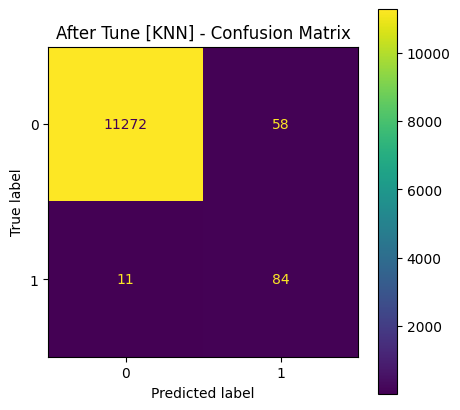

In [ ]:
best_knn_clf = grid_knn.best_estimator_
y_pred = best_knn_clf.predict(X_test)

t_kc_accuracy = best_knn_clf.score(X_test, Y_test)
t_kc_precision = precision_score(Y_test, y_pred)
t_kc_recall = recall_score(Y_test, y_pred)
t_kc_f1 = f1_score(Y_test, y_pred)
t_kc_roc_auc = roc_auc_score(Y_test, y_pred)

tuned_knn_clf_accuracy = t_kc_accuracy * 100
tuned_knn_clf_precision = t_kc_precision * 100
tuned_knn_clf_recall = t_kc_recall * 100
tuned_knn_clf_f1 = t_kc_f1 * 100
tuned_knn_clf_roc_auc = t_kc_roc_auc * 100

print("Performance Metrics of Tuned K-Nearest Neighbors (After Tuning):")
print(f"\nKNeighbors Classifier Model (Accuracy) - {tuned_knn_clf_accuracy:.2f}%")
print(f"\nKNeighbors Classifier Model (Precision) - {tuned_knn_clf_precision:.2f}%")
print(f"\nKNeighbors Classifier Model (Recall) - {tuned_knn_clf_recall:.2f}%")
print(f"\nKNeighbors Classifier Model (F1 Score) - {tuned_knn_clf_f1:.2f}%")
print(f"\nKNeighbors Classifier Model (AUROC) - {tuned_knn_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Not Fraud','Fraud']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(best_knn_clf, X_test, Y_test, ax=ax)
ax.set_title('After Tune [KNN] - Confusion Matrix')
plt.show()

#### Comparison of Performance Metrics of Classifiers Before & After Tuning:

In [ ]:
# Collect the all Performance Metrics (Before Tuning):
bt_accuracy = {'Accuracy' : [log_reg_accuracy, rf_clf_accuracy, knn_clf_accuracy]}
bt_precision = { 'Precision' : [log_reg_precision, rf_clf_precision, knn_clf_precision]}
bt_recall = { 'Recall' : [log_reg_recall, rf_clf_recall, knn_clf_recall]}
bt_f1 = { 'F1' : [log_reg_f1, rf_clf_f1, knn_clf_f1]}
bt_roc_auc = { 'AUROC' : [log_reg_roc_auc, rf_clf_roc_auc, knn_clf_roc_auc]}

# Collect the all Performance Metrics (After Tuning):
at_accuracy = { 'Accuracy' : [tuned_log_reg_accuracy, tuned_rf_clf_accuracy, tuned_knn_clf_accuracy]}
at_precision = { 'Precision' : [tuned_log_reg_precision, tuned_rf_clf_precision, tuned_knn_clf_precision]}
at_recall = { 'Recall' : [tuned_log_reg_recall, tuned_rf_clf_recall, tuned_knn_clf_recall]}
at_f1 = { 'F1' : [tuned_log_reg_f1, tuned_rf_clf_f1, tuned_knn_clf_f1]}
at_roc_auc = { 'AUROC' : [tuned_log_reg_roc_auc, tuned_rf_clf_roc_auc, tuned_knn_clf_roc_auc]}

In [ ]:
# Create a dictionary to hold all Performance Metrics of Classifiers (Before Tuning) :
results_pm_class_bt = {
    'Classifier': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy Score': bt_accuracy['Accuracy'],
    'Precision Score': bt_precision['Precision'],
    'Recall Score': bt_recall['Recall'],
    'F1 Score': bt_f1['F1'],
    'AUROC Score': bt_roc_auc['AUROC']
}

# Create a dictionary to hold all Performance Metrics of Classifiers (After Tuning):
results_pm_class_at = {
    'Classifier': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy Score': at_accuracy['Accuracy'],
    'Precision Score': at_precision['Precision'],
    'Recall Score': at_recall['Recall'],
    'F1 Score': at_f1['F1'],
    'AUROC Score': at_roc_auc['AUROC']
}
# Create a pandas DataFrame from the results
results_perfmet_class_beftun = pd.DataFrame(results_pm_class_bt)
results_perfmet_class_afttun = pd.DataFrame(results_pm_class_at)

print("Performance Metrics of Classifiers Sorted by F1 Score (Before Tuning):\n")
print(results_perfmet_class_beftun.sort_values(by='F1 Score', ascending=False).to_string(index=False, float_format='{:.2f}'.format))
print("\n")
print("Performance Metrics of Classifiers Sorted by F1 Score (After Tuning):\n")
print(results_perfmet_class_afttun.sort_values(by='F1 Score', ascending=False).to_string(index=False, float_format='{:.2f}'.format))

Performance Metrics of Classifiers Sorted by F1 Score (Before Tuning):

         Classifier  Accuracy Score  Precision Score  Recall Score  F1 Score  AUROC Score
      Random Forest           99.70            79.61         86.32     82.83        93.07
K-Nearest Neighbors           99.18            50.29         90.53     64.66        94.89
Logistic Regression           97.34            22.57         90.53     36.13        93.96


Performance Metrics of Classifiers Sorted by F1 Score (After Tuning):

         Classifier  Accuracy Score  Precision Score  Recall Score  F1 Score  AUROC Score
      Random Forest           99.79            90.80         83.16     86.81        91.54
K-Nearest Neighbors           99.40            59.15         88.42     70.89        93.95
Logistic Regression           97.33            22.51         90.53     36.06        93.96


In [ ]:
print("\nPerformance Metrics of Classifiers Sorted by AUROC (Before Tuning):\n")
print(results_perfmet_class_beftun.sort_values(by=['AUROC Score'], ascending=False).to_string(index=False, float_format='{:.2f}'.format))
print("\n")
print("Performance Metrics of Classifiers Sorted by AUROC (After Tuning):\n")
print(results_perfmet_class_afttun.sort_values(by=['AUROC Score'], ascending=False).to_string(index=False, float_format='{:.2f}'.format))


Performance Metrics of Classifiers Sorted by AUROC (Before Tuning):

         Classifier  Accuracy Score  Precision Score  Recall Score  F1 Score  AUROC Score
K-Nearest Neighbors           99.18            50.29         90.53     64.66        94.89
Logistic Regression           97.34            22.57         90.53     36.13        93.96
      Random Forest           99.70            79.61         86.32     82.83        93.07


Performance Metrics of Classifiers Sorted by AUROC (After Tuning):

         Classifier  Accuracy Score  Precision Score  Recall Score  F1 Score  AUROC Score
Logistic Regression           97.33            22.51         90.53     36.06        93.96
K-Nearest Neighbors           99.40            59.15         88.42     70.89        93.95
      Random Forest           99.79            90.80         83.16     86.81        91.54


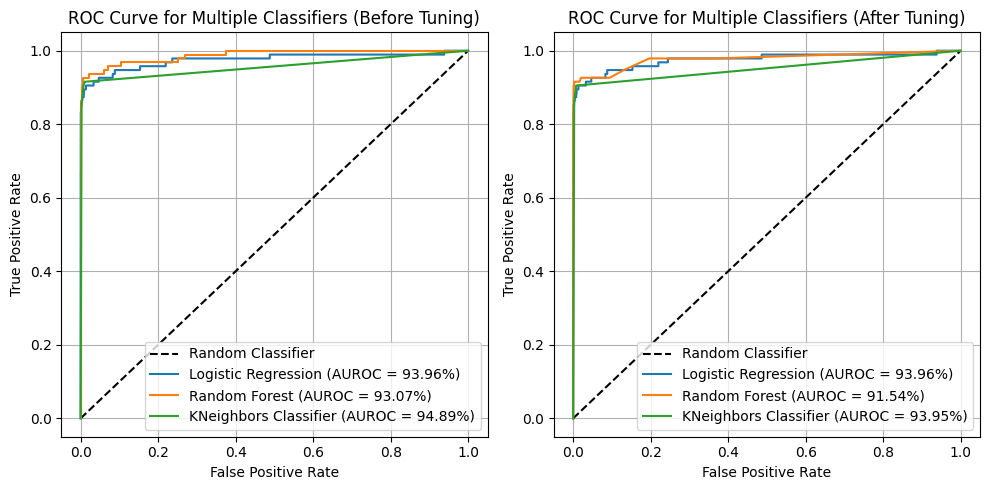

In [ ]:
# To Create a figure with subplot (Before tuning - AUROC)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot all ROC curves (Before Tuning) on the subplot
axes[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal line

fpr_lr_bt, tpr_lr_bt, _ = roc_curve(Y_test, log_reg.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_lr_bt, tpr_lr_bt, label=f'Logistic Regression (AUROC = {log_reg_roc_auc:.2f}%)')

fpr_rf_bt, tpr_rf_bt, _ = roc_curve(Y_test, rf_clf.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_rf_bt, tpr_rf_bt, label=f'Random Forest (AUROC = {rf_clf_roc_auc:.2f}%)')

fpr_knn_bt, tpr_knn_bt, _ = roc_curve(Y_test, knn_clf.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_knn_bt, tpr_knn_bt, label=f'KNeighbors Classifier (AUROC = {knn_clf_roc_auc:.2f}%)')


axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve for Multiple Classifiers (Before Tuning)')
axes[0].legend()
axes[0].grid(True)

# To Create a figure with subplot (After tuning - AUROC)
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal line

# Plot all ROC curves (After Tuning) on the subplot
fpr_lr_at, tpr_lr_at, _ = roc_curve(Y_test, best_log_reg.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_lr_at, tpr_lr_at, label=f'Logistic Regression (AUROC = {tuned_log_reg_roc_auc:.2f}%)')

fpr_rf, tpr_rf, _ = roc_curve(Y_test, best_rf_clf.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUROC = {tuned_rf_clf_roc_auc:.2f}%)')

fpr_knn, tpr_knn, _ = roc_curve(Y_test, best_knn_clf.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_knn, tpr_knn, label=f'KNeighbors Classifier (AUROC = {tuned_knn_clf_roc_auc:.2f}%)')

axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve for Multiple Classifiers (After Tuning)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Feature Importance:

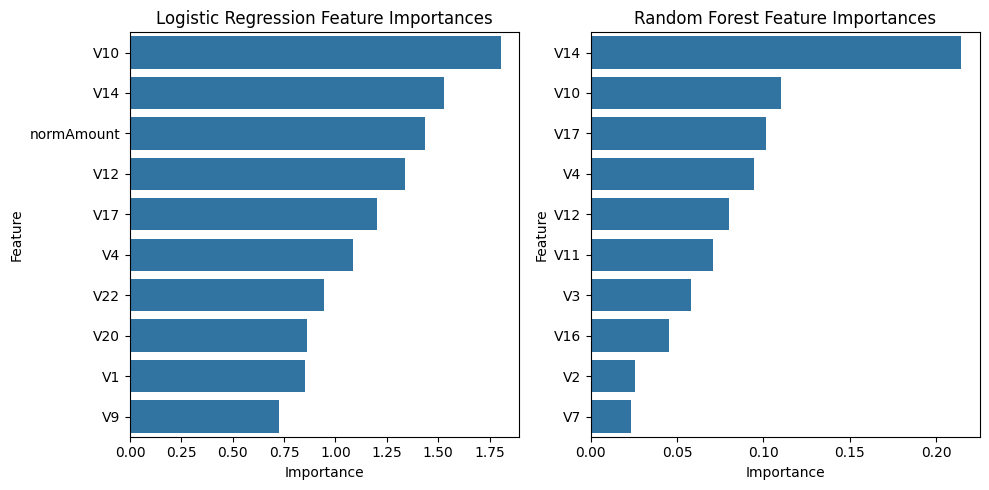


K-Nearest Neighbors Feature Importances:

Note:
Standard K-Nearest Neighbors classifiers do not provide built-in feature importances, unlike Logistic regression and Random Forest models,
which can quantify individual features directly. Their predictions are based on distances to neighbors in the feature space.


In [ ]:
# Assigning [`X`] columns (names) from the dataset used to train the model to feature_names
feature_names = X.columns

#Getting Feature Importances for Random Forest (Tuned Model):
log_reg_feature_importances = np.abs(best_log_reg.coef_[0])

#Getting Feature Importances for Random Forest (Tuned Model):
rf_feature_importances = best_rf_clf.feature_importances_

# Creating a DataFrame for Random Forest feature importances:
rf_ftimp_df = pd.DataFrame({'Importance': rf_feature_importances,'Feature': feature_names})
rf_ft_df = rf_ftimp_df.sort_values(by='Importance', ascending=False).drop_duplicates('Feature')
rf_t10 = rf_ft_df.head(10)

# Creating a DataFrame for Logistic Regression feature importances:
lr_ftimp_df = pd.DataFrame({'Importance': log_reg_feature_importances,'Feature': feature_names})
lr_ft_df = lr_ftimp_df.sort_values(by='Importance', ascending=False).drop_duplicates('Feature')
lr_t10 = lr_ft_df.head(10)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2 ,figsize=(10,5)) # Adjust figsize for two subplots

# Plotting Logistic Regression Feature Importances subplot
sns.barplot(x='Importance', y='Feature', data=lr_t10, ax=ax[0])
ax[0].set_title('Logistic Regression Feature Importances')

# Plotting Random Forest Feature Importances subplot
sns.barplot(x='Importance', y='Feature', data=rf_t10, ax=ax[1])
ax[1].set_title('Random Forest Feature Importances')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# --- Note on K-Nearest Neighbors Feature Importances ---
print('\nK-Nearest Neighbors Feature Importances:')
print("\nNote:")
print("Standard K-Nearest Neighbors classifiers do not provide built-in feature importances, unlike Logistic regression and Random Forest models,")
print("which can quantify individual features directly. Their predictions are based on distances to neighbors in the feature space.")